In [1]:
import numpy as np
import random
import datetime
import matplotlib.pyplot as plt
from itertools import chain, combinations

from Hypergraph_Product_Code_Construction_v3 import HGP_code, Toric3
from peeling_cluster_decoder import combined_peeling_and_cluster_decoder
from utilities import generate_erasure_pattern_index_set, generate_random_H_matrix, HGP_code, generate_random_error_index_set_with_erasure_support

In [2]:
def randomly_assign_qubits_to_photons(num_multiplexing,num_photons):
    num_qubits = num_multiplexing * num_photons
    qubits = [i for i in range(num_qubits)]
    photons = []
    
    for j in range(num_photons):
        qubits_in_photon = []
        for k in range(num_multiplexing):
            picked_qubit = random.choice(qubits)
            qubits_in_photon.append(picked_qubit)
            qubits.remove(picked_qubit)
        photons.append(qubits_in_photon)    
    return photons

In [3]:
def deterministically_assign_qubits_to_photons(num_multiplexing,num_photons):
    num_qubits = num_multiplexing * num_photons
    qubits = [i for i in range(num_qubits)]
    photons = []
    
    for j in range(num_photons):
        qubits_in_photon = []
        for k in range(num_multiplexing):
            picked_qubit = qubits[0]
            qubits_in_photon.append(picked_qubit)
            qubits.remove(picked_qubit)
        photons.append(qubits_in_photon)    
    return photons

In [4]:
def make_erasure_vec_from_ph(assignment, erasure_pattern):
    erased_qubits = []
    erasure_pattern = list(erasure_pattern)
    
    for index in erasure_pattern:
        erased_qubits  = erased_qubits + assignment[index]
    return erased_qubits

In [5]:
def get_success_prob(HGP, assignment, num_trials, num_photons, erasure_rate):
    num_success = 0
    num_failure = 0
    trials = 0
    while trials < num_trials:
        trials += 1
        try:
            errors_on_photons = generate_erasure_pattern_index_set(num_photons, erasure_rate)
            erasure_on_qubits = make_erasure_vec_from_ph(assignment = assignment, erasure_pattern = errors_on_photons)
            # print('erasure_on_qubits:')
            # print(erasure_on_qubits)
            random_pauli = generate_random_error_index_set_with_erasure_support(HGP.num_qubits, erasure_index_set = set(erasure_on_qubits),error_rate = erasure_rate)
            # print('random_pauli:')
            # print(random_pauli)
            syndrome = HGP.Hz_syn_index_set_for_X_err(random_pauli)
            result = combined_peeling_and_cluster_decoder(HGP_code=HGP,E_index_set_input=set(erasure_on_qubits),s_index_set_input=syndrome)

            if HGP.is_non_trivial_X_logical_error_index_set(result[0]) == False:
                num_success += 1
            else:
                num_failure += 1
        except:
            # print("Decoder failed to decode")
            num_failure += 1
    res_trials = [num_success, num_failure]
    # print('results:' + str(res_trials))
    return res_trials

In [6]:
def agresti_coull_intetrval(pair):
    # num trial n
    success = pair[0]
    fail = pair[1]
    rate = success / (success + fail)
    n = success + fail
    z = 2
    n_tilda = n  + z ** 2
    p_tilda = (1 / n_tilda) * (success + (z**2/2) )
    # conf_int_min = p_tilda + (z * (np.sqrt(  (p_tilda / n_tilda) * (1 - p_tilda) )))
    # conf_int_max = p_tilda - (z * (np.sqrt(  (p_tilda / n_tilda) * (1 - p_tilda) )))
    dif = (z * (np.sqrt(  (p_tilda / n_tilda) * (1 - p_tilda) )))
    # return [conf_int_min, rate, conf_int_max]
    # dif = conf_int_max - conf_int_min 
    return dif

In [7]:
def rate_and_error(results, num):
    rates = []
    errors = []
    for i in range(num):
        num_success = results[i][0]
        num_fail = results[i][1]
        rate = num_fail / (num_success + num_fail)
        rates.append(rate)
        error = agresti_coull_intetrval([num_success, num_fail])
        errors.append(error)
    return rates, errors

In [9]:
print(res_HGP_random)
print('--------------')
print(res_HGP_deterministic)
print('--------------')
print(res_HGP_without_qm)

[[100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0]]
--------------
[[100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [100, 0], [10

In [10]:
rate_HGP_random, error_HGP_random = rate_and_error(res_HGP_random, 50)
rate_HGP_deterministic, error_HGP_deterministic = rate_and_error(res_HGP_deterministic, 50)
rate_HGP_without_qm, error_HGP_without_qm = rate_and_error(res_HGP_without_qm, 50)

In [24]:
from utilities import index_to_biindex, biindex_to_index

# A function to partion the the qubits in a code into different photons of equal size.
# Assumes a HGP code and will only assign qubits in different rows/columns together.

def HGP_different_row_and_col_assign_qubits_to_photons(num_multiplexing,num_photons,HGP_code):
    num_qubits = num_multiplexing * num_photons
    qubits = [i for i in range(num_qubits)]
    photons = []
    photons_biindex = []
    
    # Define a number to track the number of times qubits could not be selected in a different row/col.
    # In these cases, random assignment of qubit in a photon is made.
    # This is for information purposes only and does not affect the function.
    number_of_random_assignments = 0
    
    if num_qubits != HGP_code.num_qubits:
        raise Exception("The number of qubits in HGP code does not match, cannot properly assign to photons!")
        
    # Assign qubits to photons at random, checking the following conditions hold for EACH qubit in photon:
    # If qubits are from different blocks (horizontal vs vertical), no problem.
    # If qubits are from the same block, check they are in a different row and column.
    # If this condition fails, discard this qubit and try again with another selected at random.
    # If all valid assignments meeting the above conditions have been exhausted, then assign a qubit at random.
    for photon_index in range(num_photons):
        qubits_in_photon = []
        qubits_biindex_in_photon = []
        
        # Create a copy of a the original list of qubits and create a shuffled copy of it.
        # This is way, qubits can be taken at random and also exhaustively iterated through.
        shuffled_qubit_list = qubits.copy()
        random.shuffle(shuffled_qubit_list)
        
        # Set the maximum number of iterations; it's possible no remaining qubits satisfy conditions.
        max_iterations = len(shuffled_qubit_list)
        current_iteration = 0        

        for multiplex_index in range(num_multiplexing):          
            # Loop through qubits at random and try to add these to the photon, if possible meeting conditions.
            # Loop repeats a number of times equal to the multiplexing.
            while ((len(qubits_in_photon) < num_multiplexing) and (current_iteration < max_iterations)):
                current_iteration += 1
                
                # "Pop" the first element of the shuffled qubit list; shuffled ensures qubit added at random.
                # Also, popping removes the element from the list, so it is ingnored in subsequent loops.
                picked_qubit_index = shuffled_qubit_list.pop(0)

                #DEBUG
                #print("1: picked qubit index:"+str(picked_qubit_index))

                # Infer the biindex of this qubit; it depends on information from the HGP block structure.
                # There are two cases, depending on the block
                if picked_qubit_index < HGP_code.num_v_qubits:
                    # Horizontal case
                    picked_qubit_biindex = index_to_biindex(
                        index=picked_qubit_index,num_cols=HGP_code.n2,index_shift=0)
                else:
                    # Vertical case
                    picked_qubit_biindex = index_to_biindex(
                        index=picked_qubit_index,num_cols=HGP_code.r2,index_shift=HGP_code.num_v_qubits)

                # Assign if first qubit.
                if len(qubits_in_photon)==0:
                    qubits_in_photon.append(picked_qubit_index)
                    qubits_biindex_in_photon.append(picked_qubit_biindex)
                    qubits.remove(picked_qubit_index)

                else:
                    conditions_satisfied = True
                    # Iterate through each of the previously selected qubits and check they satisfy conditions.
                    for qubit_in_photon_index in range(len(qubits_in_photon)):
                        prior_qubit_index = qubits_in_photon[qubit_in_photon_index]
                        prior_qubit_biindex = qubits_biindex_in_photon[qubit_in_photon_index]

                        #DEBUG
                        #print(" 2. Comparing qubits "+str(picked_qubit_index)+" and "+str(prior_qubit_index))
                        #print("    Candidates for inclusion in photon "+str(photon_index))

                        # We only need to check the condition for qubits in the same block.
                        if (((picked_qubit_index<HGP_code.num_h_qubits) and 
                             (prior_qubit_index<HGP_code.num_h_qubits)) 
                            or ((picked_qubit_index>=HGP_code.num_h_qubits) and 
                                (prior_qubit_index>=HGP_code.num_h_qubits))):
                            # If qubits are in the same row or column, condition is not satisfied.
                            if ((picked_qubit_biindex[0]==prior_qubit_biindex[0]) or 
                                (picked_qubit_biindex[1]==prior_qubit_biindex[1])):
                                conditions_satisfied = False
                                # DEBUG
                                #print(" ---> These qubits are in same row or column of same block")
                                break

                    # Add the new qubit if it satisfies conditions on all previously selected qubits.
                    if (conditions_satisfied==True):
                        qubits_in_photon.append(picked_qubit_index)
                        qubits_biindex_in_photon.append(picked_qubit_biindex)
                        qubits.remove(picked_qubit_index)
                            
            if ((current_iteration==max_iterations) and (len(qubits_in_photon) < num_multiplexing)):
                # If all remaining qubits have been compared and none satisfy conditions, preceding loop ends.
                # In this case, default to random assignment for the remaining qubits in this photon.
                
                # DEBUG
                #print(" Photon number "+str(photon_index)+" unable to be constructed meeting conditions.")
                #print(" Instead, assigning possible remaining qubits to this photon at random.")
                
                shuffled_qubit_list = qubits.copy()
                random.shuffle(shuffled_qubit_list)
                picked_qubit_index = shuffled_qubit_list.pop()

                if picked_qubit_index < HGP_code.num_v_qubits:
                    # Horizontal case
                    picked_qubit_biindex = index_to_biindex(
                        index=picked_qubit_index,num_cols=HGP_code.n2,index_shift=0)
                else:
                    # Vertical case
                    picked_qubit_biindex = index_to_biindex(
                        index=picked_qubit_index,num_cols=HGP_code.r2,index_shift=HGP_code.num_h_qubits)
                
                qubits_in_photon.append(picked_qubit_index)
                qubits_biindex_in_photon.append(picked_qubit_biindex)
                qubits.remove(picked_qubit_index)
                
        # DEBUG
        #print("  3. Qubits in photon number "+str(photon_index)+" (index list and biindex list)")
        #print(qubits_in_photon)
        #print(qubits_biindex_in_photon)
        
        # Add the qubits in the photon to the list of photons.
        photons.append(qubits_in_photon)
        photons_biindex.append(qubits_biindex_in_photon)
        
    # DEBUG
    print("Number of times defaulted to random assignment: "+str(number_of_random_assignments))
    
    return photons #, photons_biindex

In [25]:
#HGP_different_row_and_col_assign_qubits_to_photons(num_multiplexing,num_photons,HGP_code)
HGP_different_row_and_col_assign_qubits_to_photons(num_multiplexing=3,num_photons=6,HGP_code=Toric3)

Number of times defaulted to random assignment: 0


[[3, 17, 1], [6, 15, 11], [9, 8, 13], [5, 10, 12], [2, 4, 14], [0, 7, 16]]

In [14]:
HGP_different_row_and_col_assign_qubits_to_photons(num_multiplexing=2,num_photons=9,HGP_code=Toric3)

Number of times defaulted to random assignment: 0


([[4, 17],
  [5, 9],
  [16, 8],
  [3, 14],
  [15, 7],
  [12, 0],
  [6, 11],
  [1, 13],
  [2, 10]],
 [[(1, 1), (2, 2)],
  [(1, 2), (0, 0)],
  [(2, 1), (2, 2)],
  [(1, 0), (1, 2)],
  [(2, 0), (2, 1)],
  [(1, 0), (0, 0)],
  [(2, 0), (0, 2)],
  [(0, 1), (1, 1)],
  [(0, 2), (0, 1)]])

In [15]:
Hrep5 = np.array([[1,1,0,0,0],[0,1,1,0,0],[0,0,1,1,0],[0,0,0,1,1],[1,0,0,0,1]])
Hrep5

array([[1, 1, 0, 0, 0],
       [0, 1, 1, 0, 0],
       [0, 0, 1, 1, 0],
       [0, 0, 0, 1, 1],
       [1, 0, 0, 0, 1]])

In [16]:
Toric5 = HGP_code(Hrep5,Hrep5)
Toric5.num_qubits, Toric5.num_h_qubits, Toric5.num_v_qubits

(50, 25, 25)

In [26]:
HGP_different_row_and_col_assign_qubits_to_photons(num_multiplexing=2,num_photons=25,HGP_code=Toric5)

Number of times defaulted to random assignment: 0


[[4, 8],
 [6, 15],
 [12, 31],
 [29, 2],
 [21, 38],
 [27, 18],
 [41, 37],
 [9, 23],
 [34, 17],
 [30, 22],
 [11, 26],
 [1, 14],
 [49, 0],
 [10, 46],
 [13, 32],
 [7, 3],
 [25, 16],
 [42, 5],
 [43, 19],
 [36, 24],
 [20, 44],
 [39, 48],
 [35, 33],
 [47, 28],
 [40, 45]]

In [27]:
HGP_different_row_and_col_assign_qubits_to_photons(num_multiplexing=5,num_photons=10,HGP_code=Toric5)

Number of times defaulted to random assignment: 0


[[34, 40, 48, 24, 2],
 [26, 43, 22, 35, 10],
 [45, 5, 44, 19, 38],
 [46, 1, 25, 18, 12],
 [32, 6, 3, 41, 15],
 [47, 14, 8, 33, 36],
 [11, 31, 23, 28, 39],
 [7, 37, 29, 20, 16],
 [4, 27, 49, 21, 17],
 [30, 13, 42, 0, 9]]

In [28]:
HGP_different_row_and_col_assign_qubits_to_photons(num_multiplexing=10,num_photons=5,HGP_code=Toric5)

Number of times defaulted to random assignment: 0


[[11, 17, 45, 9, 36, 32, 29, 3, 43, 20],
 [40, 13, 5, 16, 46, 24, 2, 28, 37, 34],
 [10, 6, 18, 48, 35, 42, 26, 4, 22, 15],
 [44, 0, 19, 38, 21, 31, 8, 27, 12, 25],
 [1, 23, 14, 41, 7, 33, 39, 47, 49, 30]]

In [20]:
H1_test = generate_random_H_matrix(total_bits=10,bit_node_deg=4,check_node_deg=5)
H2_test = generate_random_H_matrix(total_bits=10,bit_node_deg=4,check_node_deg=5)
HGP_test = HGP_code(H1_test,H2_test.T)

In [21]:
HGP_test.num_qubits, HGP_test.num_h_qubits, HGP_test.num_v_qubits

(160, 80, 80)

In [29]:
HGP_different_row_and_col_assign_qubits_to_photons(num_multiplexing=8,num_photons=20,HGP_code=HGP_test)

Number of times defaulted to random assignment: 0


[[50, 19, 7, 106, 29, 140, 60, 9],
 [159, 111, 6, 77, 124, 138, 32, 96],
 [78, 123, 155, 114, 100, 131, 18, 97],
 [85, 66, 110, 91, 45, 142, 103, 57],
 [11, 112, 37, 1, 154, 56, 146, 89],
 [144, 4, 39, 150, 72, 53, 81, 62],
 [33, 64, 51, 13, 107, 99, 128, 156],
 [84, 41, 113, 23, 149, 157, 121, 76],
 [83, 20, 125, 79, 25, 141, 42, 139],
 [73, 43, 10, 90, 115, 24, 133, 21],
 [16, 116, 70, 80, 104, 3, 55, 95],
 [88, 17, 38, 28, 47, 136, 122, 93],
 [132, 75, 108, 5, 46, 87, 126, 58],
 [71, 130, 36, 105, 2, 49, 152, 117],
 [65, 145, 151, 86, 34, 54, 127, 94],
 [30, 44, 118, 82, 63, 35, 147, 101],
 [148, 52, 22, 59, 109, 26, 135, 120],
 [68, 153, 134, 74, 61, 0, 15, 102],
 [40, 31, 12, 119, 98, 67, 143, 137],
 [8, 129, 69, 27, 158, 92, 14, 48]]

In [30]:
HGP_different_row_and_col_assign_qubits_to_photons(num_multiplexing=40,num_photons=4,HGP_code=HGP_test)

Number of times defaulted to random assignment: 0


[[5,
  17,
  79,
  30,
  116,
  152,
  87,
  43,
  145,
  121,
  10,
  48,
  94,
  60,
  133,
  100,
  34,
  35,
  128,
  86,
  36,
  137,
  98,
  50,
  158,
  46,
  122,
  66,
  56,
  154,
  2,
  21,
  59,
  3,
  47,
  157,
  140,
  26,
  156,
  118],
 [91,
  108,
  142,
  9,
  110,
  136,
  28,
  69,
  84,
  125,
  63,
  32,
  75,
  6,
  153,
  42,
  151,
  93,
  25,
  83,
  104,
  58,
  0,
  129,
  19,
  39,
  107,
  76,
  73,
  1,
  7,
  81,
  89,
  113,
  144,
  146,
  131,
  54,
  159,
  143],
 [112,
  64,
  155,
  141,
  57,
  55,
  88,
  74,
  14,
  20,
  37,
  126,
  139,
  27,
  97,
  103,
  61,
  4,
  22,
  95,
  24,
  16,
  77,
  29,
  11,
  31,
  23,
  13,
  99,
  78,
  67,
  147,
  62,
  40,
  105,
  148,
  71,
  90,
  135,
  114],
 [109,
  72,
  96,
  18,
  117,
  68,
  132,
  38,
  41,
  80,
  51,
  124,
  15,
  45,
  130,
  102,
  44,
  127,
  106,
  123,
  120,
  82,
  115,
  119,
  53,
  65,
  150,
  111,
  8,
  134,
  52,
  70,
  33,
  92,
  101,
  85,
  49,
  12,
 

In [35]:
H1 = generate_random_H_matrix(total_bits=10,bit_node_deg=4,check_node_deg=5)
H2 = generate_random_H_matrix(total_bits=10,bit_node_deg=4,check_node_deg=5)
HGP = HGP_code(H1,H2)
print('HGP.num_qubits:' + str(HGP.num_qubits))

HGP.num_qubits:164


In [41]:
H1 = generate_random_H_matrix(total_bits=10,bit_node_deg=4,check_node_deg=5)
H2 = generate_random_H_matrix(total_bits=10,bit_node_deg=4,check_node_deg=5)
HGP = HGP_code(H1,H2)
print('HGP.num_qubits:' + str(HGP.num_qubits))
erasure_rates = [0 + 0.01 * i for i in range(50)]

dt_now = datetime.datetime.now()
print(dt_now)

random_assignment = randomly_assign_qubits_to_photons(2,82)
print('assignment:' + str(random_assignment))
res_HGP_random = []
for i in erasure_rates:
    res_trials = get_success_prob(HGP=HGP, assignment=random_assignment, num_trials = 10000, num_photons = 82, erasure_rate = i)
    # print(str(i) + ':' + str(res_trials))
    res_HGP_random.append(res_trials)

dt_now = datetime.datetime.now()
print(dt_now)
    
deterministic_assignment = deterministically_assign_qubits_to_photons(2,82)
print('assignment:' + str(deterministic_assignment))
res_HGP_deterministic = []
for i in erasure_rates:
    res_trials = get_success_prob(HGP=HGP, assignment=deterministic_assignment, num_trials = 10000, num_photons = 82, erasure_rate = i)
    # print(str(i) + ':' + str(res_trials))
    res_HGP_deterministic.append(res_trials)

dt_now = datetime.datetime.now()
print(dt_now)

assignment_without_qm = deterministically_assign_qubits_to_photons(1,164)
print('assignment:' + str(assignment_without_qm))
res_HGP_without_qm = []
for i in erasure_rates:
    res_trials = get_success_prob(HGP=HGP, assignment=assignment_without_qm, num_trials = 10000, num_photons = 164, erasure_rate = i)
    # print(str(i) + ':' + str(res_trials))
    res_HGP_without_qm.append(res_trials)

dt_now = datetime.datetime.now()
print(dt_now)
    
HGP_assignment = HGP_different_row_and_col_assign_qubits_to_photons(num_multiplexing=2,num_photons=82,HGP_code=HGP)
print('HGP_assignment:' + str(HGP_assignment))
res_HGP_row_col = []
for i in erasure_rates:
    res_trials = get_success_prob(HGP=HGP, assignment=HGP_assignment, num_trials = 10000, num_photons = 82, erasure_rate = i)
    # print(str(i) + ':' + str(res_trials))
    res_HGP_row_col.append(res_trials)
    
dt_now = datetime.datetime.now()
print(dt_now)

HGP.num_qubits:164
2024-03-11 15:08:57.061121
assignment:[[74, 56], [120, 159], [78, 93], [92, 125], [146, 38], [36, 156], [149, 65], [150, 81], [154, 151], [76, 25], [97, 152], [58, 161], [46, 133], [143, 87], [69, 72], [51, 153], [3, 77], [131, 130], [49, 145], [43, 54], [88, 71], [2, 160], [45, 8], [79, 142], [16, 53], [163, 102], [122, 89], [11, 123], [40, 119], [157, 85], [132, 90], [141, 5], [94, 107], [24, 138], [139, 7], [59, 35], [127, 98], [15, 101], [140, 80], [104, 23], [70, 47], [113, 137], [0, 116], [114, 158], [60, 103], [6, 18], [83, 64], [109, 67], [111, 12], [105, 26], [29, 41], [33, 21], [112, 162], [136, 13], [9, 124], [62, 19], [129, 82], [147, 84], [100, 117], [95, 121], [126, 28], [50, 73], [4, 10], [110, 86], [27, 108], [20, 106], [99, 39], [148, 48], [42, 22], [134, 61], [96, 32], [155, 115], [66, 44], [135, 128], [34, 37], [52, 91], [1, 55], [75, 57], [17, 14], [118, 144], [63, 68], [30, 31]]
2024-03-11 15:52:02.195368
assignment:[[0, 1], [2, 3], [4, 5], [6, 7

In [33]:
HGP.num_qubits, HGP.num_h_qubits, HGP.num_v_qubits

(164, 100, 64)

In [42]:
rate_HGP_random, error_HGP_random = rate_and_error(res_HGP_random, 50)
rate_HGP_deterministic, error_HGP_deterministic = rate_and_error(res_HGP_deterministic, 50)
rate_HGP_without_qm, error_HGP_without_qm = rate_and_error(res_HGP_without_qm, 50)
rate_HGP_row_col, error_HGP_row_col = rate_and_error(res_HGP_row_col, 50)

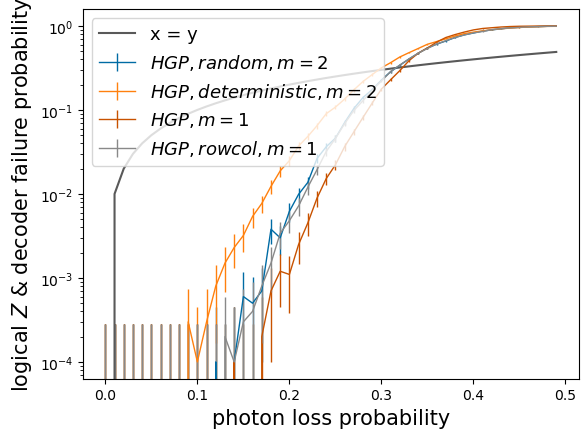

In [45]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.errorbar(erasure_rates, rate_HGP_random, error_HGP_random, label = r'$HGP, random, m=2$', color = 'C0', linewidth= 1)
ax.errorbar(erasure_rates, rate_HGP_deterministic, error_HGP_deterministic, label = r'$HGP, deterministic, m=2$', color = 'C1', linewidth= 1)
ax.errorbar(erasure_rates, rate_HGP_without_qm, error_HGP_without_qm, label = r'$HGP, m=1$', color = 'C5', linewidth= 1)
ax.errorbar(erasure_rates, rate_HGP_row_col, error_HGP_row_col, label = r'$HGP, row col, m=1$', color = 'C6', linewidth= 1)


ax.plot(erasure_rates, erasure_rates, color = 'C3', label= "x = y")
ax.set_yscale('log')
ax.set_xlabel("photon loss probability", fontsize = 15)
ax.set_ylabel(r"logical $Z$ & decoder failure probability", fontsize = 15)
# ax.set_xlim(0.30x, 0.55)

# ax.set_title(r"$10\times 10$ toric codes", fontsize = 15)
# ax.set_facecolor('lightgrey')
plt.style.use('tableau-colorblind10')
plt.legend(loc='upper left', fontsize = 13)
# plt.savefig("10_10_multiplexed_toric_minmax.pdf")
plt.savefig("multiplexed_HGP_random.pdf")
plt.show()

In [ ]:
# 100000 shots
# m = [1,2,4,8,16] 
# codelength n: 100,200,500,1000
# assignment random, row_col, deterministic,   



In [46]:
H1_n100 = generate_random_H_matrix(total_bits=8,bit_node_deg=3,check_node_deg=4)
H2_n100 = generate_random_H_matrix(total_bits=8,bit_node_deg=3,check_node_deg=4)

In [47]:
HGP_n100 = HGP_code(H1_n100,H2_n100)
print('HGP_n100.num_qubits:' + str(HGP_n100.num_qubits))

HGP_n100.num_qubits:100


In [78]:
def run_decoder_with_assignment(
    code,num_multiplexing,assignment_type,num_trials,max_erasure_rate,min_erasure_rate,num_steps):
    num_photons = code.num_qubits//num_multiplexing
    
    if assignment_type == 0:
        # deterministic, it can also be used for the case without multiplexing
        assignment = deterministically_assign_qubits_to_photons(num_multiplexing,num_photons)
    elif assignment_type == 1:
        # random
        assignment = randomly_assign_qubits_to_photons(num_multiplexing,num_photons)
    elif assignment_type == 2:
        # random with row col constraint
        assignment=HGP_different_row_and_col_assign_qubits_to_photons(
        num_multiplexing=num_multiplexing,num_photons=num_photons,HGP_code=code)
    else:
        print("invalid assignment")
    
    res = []
    step_size = (max_erasure_rate-min_erasure_rate)/num_steps
    erasure_rates = [i*step_size+min_erasure_rate for i in range(num_steps)]
    
    for i in erasure_rates:
        res_trials = get_success_prob(
            HGP=code,assignment=assignment,num_trials=num_trials,num_photons=num_photons,erasure_rate=i)
        res.append(res_trials)
        
    rate, error = rate_and_error(res,num_steps)
        
    return res,rate, error, assignment

In [69]:
run_decoder_row_col_assignment(
    code=HGP_n100,
    num_multiplexing=2,
    num_trials=1000,
    max_erasure_rate=0.5,
    min_erasure_rate=0.2,
    num_steps=10)

TypeError: run_decoder_row_col_assignment() got an unexpected keyword argument 'assignment'

In [88]:
dir(HGP_n100)

['Gx',
 'Gx_adj_list',
 'Gz',
 'Gz_adj_list',
 'H1',
 'H2',
 'Hx',
 'Hx1',
 'Hx2',
 'Hx_standard_form',
 'Hx_syn_for_Z_err',
 'Hz',
 'Hz1',
 'Hz2',
 'Hz_standard_form',
 'Hz_syn_for_X_err',
 'Hz_syn_index_set_for_X_err',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'dim',
 'is_non_trivial_X_logical_error',
 'is_non_trivial_X_logical_error_index_set',
 'is_non_trivial_Z_logical_error',
 'is_product_of_generators_fully_erased',
 'kx',
 'kz',
 'list_of_checks',
 'list_of_checks_per_qubit',
 'list_of_generators',
 'list_of_generators_per_qubit',
 'list_of_horizontal_qubits_per_check',
 'list_of_horizontal_qubits_per_generator',
 'list_of_qubits_per_chec

In [91]:
HGP_n100.Hx.tolist()

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0]

In [79]:
res, rate, error, assignment = run_decoder_with_assignment(
    code=HGP_n100,
    num_multiplexing=2,
    assignment_type = 2,
    num_trials=10,
    max_erasure_rate=0.5,
    min_erasure_rate=0.2,
    num_steps=10)

Number of times defaulted to random assignment: 0


In [92]:
import json 

def save_results(assignment_type,assignment,res,rate,error,code,num_multiplexing):
    
    num_photons = code.num_qubits//num_multiplexing
    dt_now = datetime.datetime.now()

    # Data to be written
    results_dictionary = {
        "Code_length": code.num_qubits,
        "Code_dimension": code.dim,
        "HGP.Hx": code.Hx.tolist(),
        "HGP.Hz": code.Hx.tolist(),
        "H1": code.H1.tolist(),
        "H2": code.H2.tolist(),
        "assignment type": assignment_type,
        "assignment": assignment,
        "res": res,
        "rate": rate,
        "error": error,
        "num_multiplexing": num_multiplexing,
        "num_photons": num_photons,
        "time":str(dt_now)
    }

 
    # Serializing json
    json_object = json.dumps(results_dictionary, indent=4)
    
    
    file_name_base = "results_HGP_" +str(code.num_qubits)
    
    if assignment_type == 0:
        # deterministic, it can also be used for the case without multiplexing
        file_name = file_name_base+"_deterministic_assignment"
    elif assignment_type == 1:
        # random
        file_name = file_name_base+"_random_assignment"
    elif assignment_type == 2:
        # random with row col constraint
        file_name = file_name_base+"_row_col_assignment"
    else:
        print("invalid assignment")
    # Writing to sample.json
    
    with open(file_name+".json", "w") as outfile:
        outfile.write(json_object)
        
    return results_dictionary

In [94]:
save_results(
    assignment_type=2,assignment=assignment,res=res,rate=rate,error=error,code=HGP_n100,num_multiplexing=2)

{'Code_length': 100,
 'Code_dimension': 4,
 'HGP.Hx': [[0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   1,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0],
  [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1

In [101]:
np.shape(HGP_n100.Hz)

(48, 100)

In [100]:
HGP_n100.kz

52